<a href="https://colab.research.google.com/github/muhbagasaryad/Python/blob/main/Muhammad_Bagas_A_D__1101180139_Tubes_SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Bagas Arya Darmawan 

NIM : 1101180139

Kelas : TT-42-07

In [274]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

Objek perancangan FTTB :

--> Sentral - ODC - ONU - ODP - roset

- 1 Gedung = 40 Lantai

- 1 Lantai = 20 kamar

- 6 Connector dan 2 spliter

- 1 spliter dengan redaman 19.5 dB perbandungan 1:64 dari ONU ke ODP dan 1 spliter dengan redaman 16 dB perbandingan 1:32 dari ODP ke roset.

- jenis fiber G625D dengan panjang gelombang 1310 nm dengan redaman 0.35 dB/Km

- 8 Splicer dengan redaman 0.1 dB

***

***

- Jarak Sentral ke ONU = 20 Km
- Jarak ONU ke Roset = 4 x 3 = 12 meter
- Total jarak = 20 Km + 12 meter = 20012 meter atau 20.012 Km

Parameter - parameter

In [275]:
#dayaterima (Pr)

d= np.arange(1.012,20.013,1)
#print(d)
lf = 0.35 * d #dB (loss fiber)
ns = 8 #jumlah Splicer
ls = 0.1 * 8 #dB (loss Splicer dikali ns)
nc = 6 #jumlah connector
lc = 0.3 * 6 #dB (loss connector dikali nc)
l_sp = 16 + 19.5 #dB (loss Splitter 1:64 dan 1:32)
pt = 5 #dBm

#SNR

R = 0.85 #A/W (Responsifitas)
M = -0.23 #db (Tambahan daya sinyal)
lm = 3 #dB (loss margin)
q = 1.6*10**-19 #Muatan
#ip = 1 #
id = 2*10**-7 #Ampere (arus gelap)
B = 8*10**9 #Bandwith
F = 1 #noise figure
K = 1.38*10**-23 #k.boltzman
teff = 290 #kelvin
RL = 50 #

#Convert

NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

Fungsi Pr (daya terima)


In [276]:
def PR(pt,d,lf,ns,ls,nc,lc,l_sp,lm):
  RT = lf + ls + lc + l_sp + lm
  pr = pt - RT
  return pr
pr = PR(pt,d,lf,ns,ls,nc,lc,l_sp,lm)
print(pr)

[-36.4542 -36.8042 -37.1542 -37.5042 -37.8542 -38.2042 -38.5542 -38.9042
 -39.2542 -39.6042 -39.9542 -40.3042 -40.6542 -41.0042 -41.3542 -41.7042
 -42.0542 -42.4042 -42.7542 -43.1042]


Fungsi SNR

In [277]:
#Arus primer
def ap(pr):
  pr_num = LtN(pr)
  ip = pr_num * R
  return ip
ip = ap(pr)
#print(ip)

#BDC
def bdc(q,id,B,M,F):
  BDC = 2*q*id*B*M*M*F
  return BDC
BDC = bdc(q,id,B,M,F)
#print(BDC)

#SN (shot noise)
def sn(q,ip,B,M,F):
  SN = 2*q*ip*B*M*M*F
  return SN
SN = sn(q,ip,B,M,F)
#print(SN)

#NT (noise thermal)
def nt(K,teff,B,RL):
  NT = (4*K*teff*B)/RL
  return NT
NT = nt(K,teff,B,RL)
#print(NT)

#SNR (signal noise ratio)
def snr(BDC,SN,NT,M,ip):
  SNR = ((ip)**2 * M**2)/(BDC + SN + NT)
  SNR1 = NtL(SNR) #dalam dB 
  return SNR1
SNR1 = snr(BDC,SN,NT,M,ip)
print(SNR1) #dB

[28.78598292 28.08936898 27.3924952  26.69538136 25.99804575 25.30050529
 24.60277563 23.90487123 23.20680547 22.50859071 21.81023838 21.11175902
 20.41316239 19.7144575  19.01565268 18.3167556  17.61777338 16.91871257
 16.21957921 15.52037891]


Fungsi Q-Faktor

In [278]:
#Q-Faktor
def qf(SNR1):
  qf = 10**(SNR1/20)
  return qf
QF = qf(SNR1)
print(QF)

[27.4978758  25.37864606 23.42204225 21.61568824 19.94813449 18.4087909
 16.98786424 15.67629984 14.4657273  13.34840994 12.31719789 11.36548442
 10.48716544  9.67660192  8.92858493  8.23830336  7.60131393  7.01351336
  6.47111266  5.97061332]


Fungsi BER 

In [279]:
def ber(QF):
  phi = 3.14159
  BER = (1/(QF*np.sqrt(2*phi)))*(np.exp(-QF**2/2))
  return BER
BER = ber(QF)
print(BER)

[9.31920001e-167 2.17363109e-142 1.27653455e-121 6.40771713e-104
 7.79875960e-089 5.60080026e-076 5.06740077e-065 1.10285646e-055
 1.00214819e-047 6.08379979e-041 3.68349404e-035 3.12963253e-030
 4.99183023e-026 1.91537001e-022 2.18388706e-019 8.85863673e-017
 1.49025214e-014 1.18478277e-012 4.97537297e-011 1.21332724e-009]


Grafik SNR

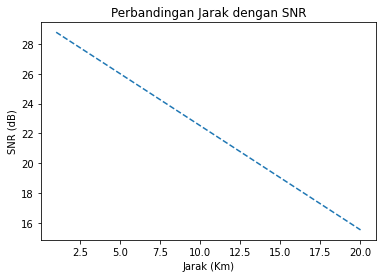

In [280]:
def g_snr():
  plt.figure()
  plt.plot(d,SNR1,'--')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

g_snr()

Grafik Q-Faktor

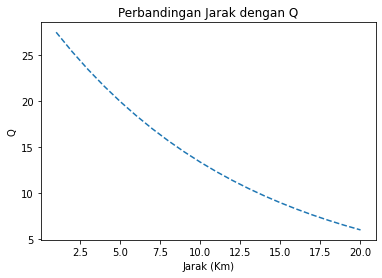

In [281]:
def g_Q():
  plt.figure()
  plt.plot(d,QF,'--')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

g_Q()

Grafik BER

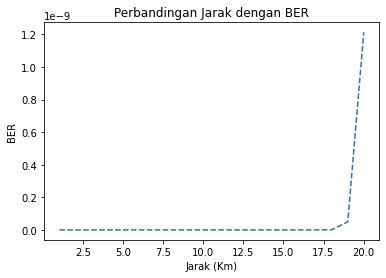

In [282]:
def g_BER():
  plt.figure()
  plt.plot(d,BER,'--')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

g_BER()